In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/ML Capstone/OnlineNewsPopularity.csv")

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Basic Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [9]:
df.describe(include='all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
unique,39644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2013/01/07/amazon-instant-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,NaN,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,NaN,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,NaN,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,NaN,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,NaN,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000


Described all columns, made a note of the mean, median, and minimum values. So far, no valid errors have been pointed out in the above results.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

**1. What are the key trends in the distribution of shares based on the combination of multiple factors such as day of the week, number of tokens in title/content, sentiment (positive/negative polarity), and media features (number of images/videos)?**

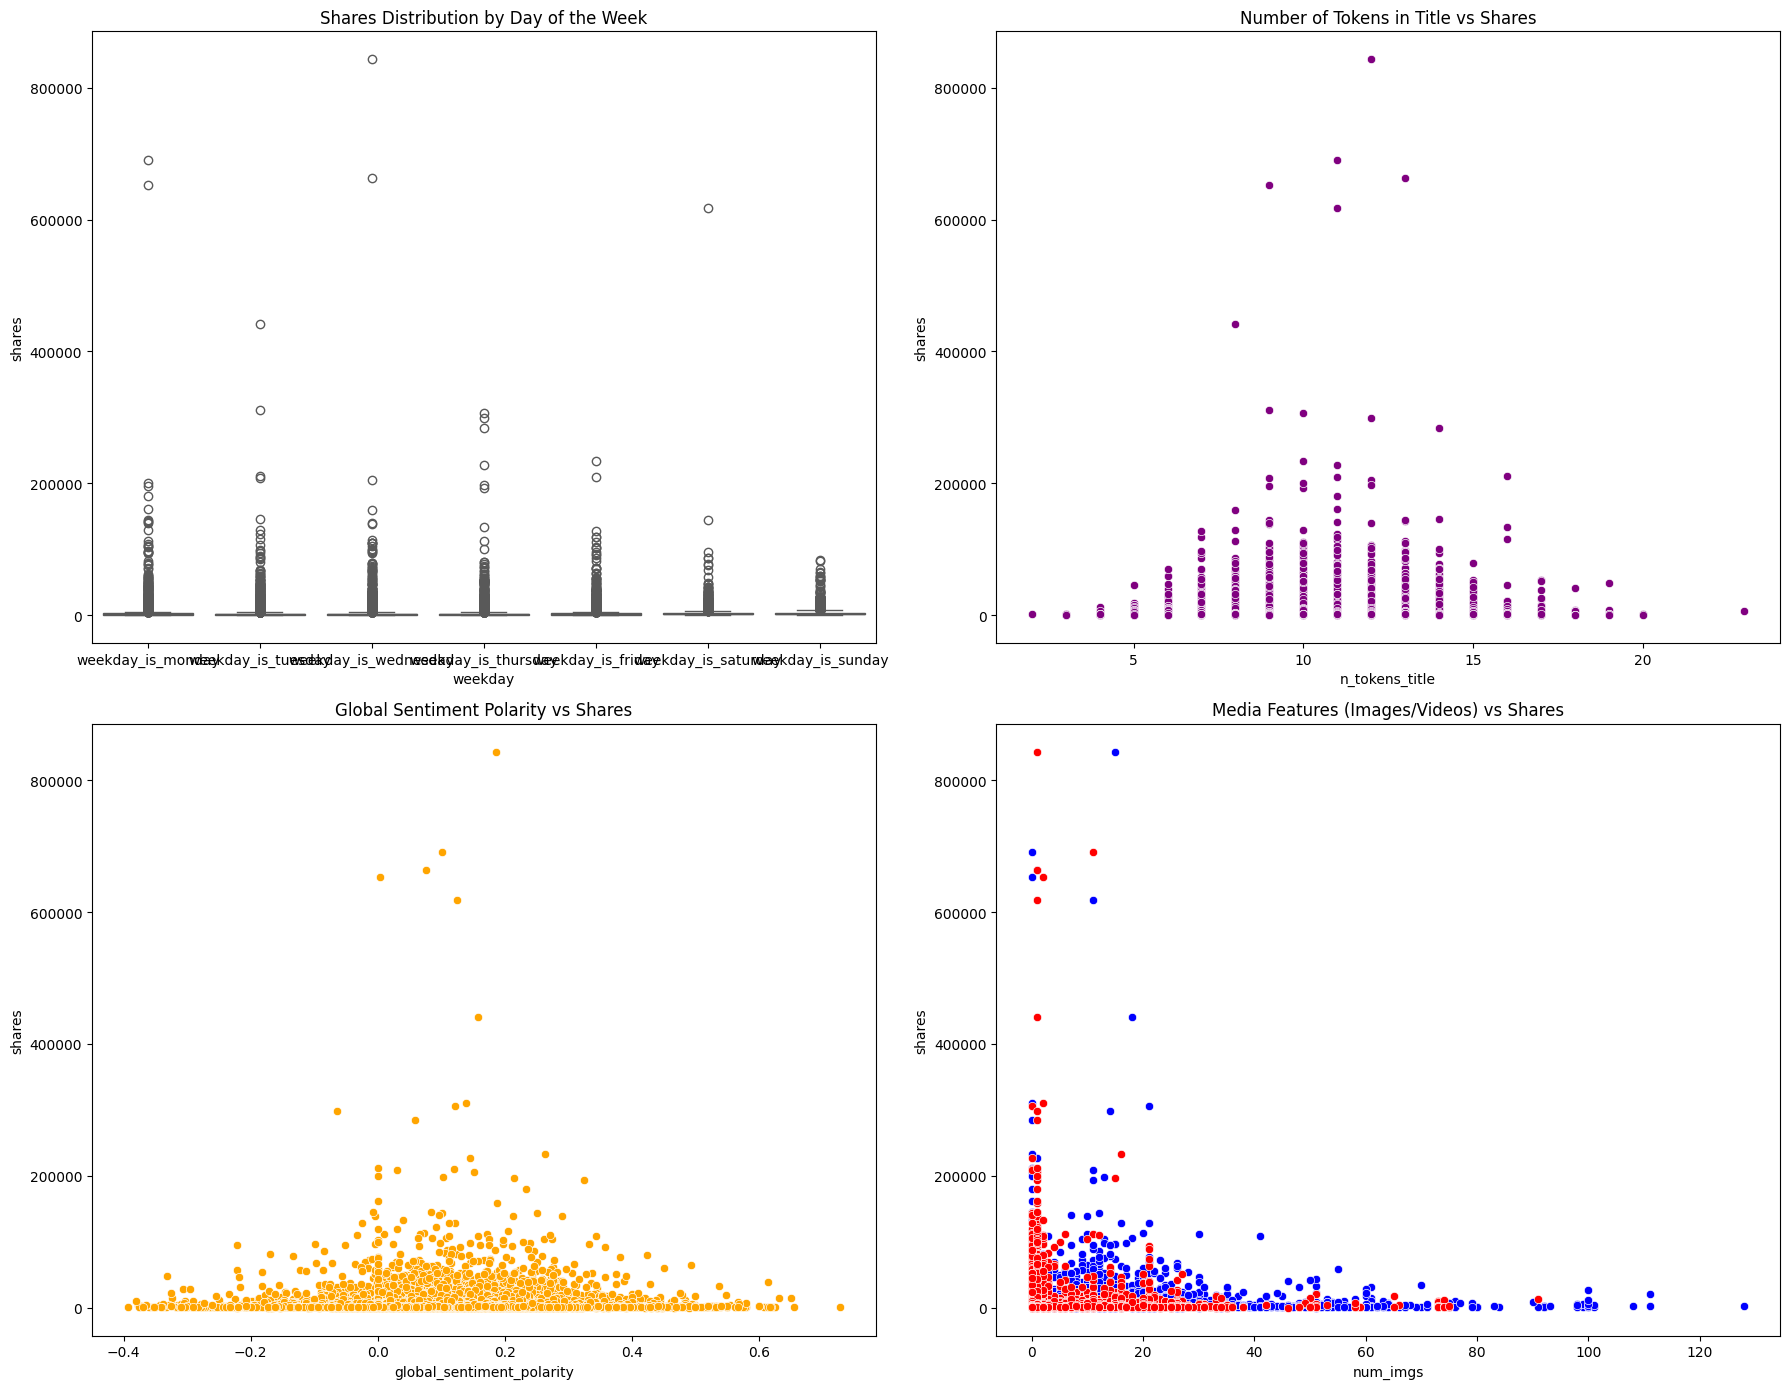

Correlation between Tokens in Title and Shares: 0.01
Correlation between Sentiment Polarity and Shares: 0.00
Correlation between Images and Shares: 0.04
Correlation between Videos and Shares: 0.02


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


weekday_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
                   'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

df['weekday'] = df[weekday_columns].idxmax(axis=1)


fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Distribution of shares by day of the week
sns.boxplot(x='weekday', y='shares', data=df, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Shares Distribution by Day of the Week')

# Plot 2: Relationship between number of tokens in title and shares
sns.scatterplot(x='n_tokens_title', y='shares', data=df, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Number of Tokens in Title vs Shares')

# Plot 3: Relationship between positive polarity and shares
sns.scatterplot(x='global_sentiment_polarity', y='shares', data=df, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Global Sentiment Polarity vs Shares')

# Plot 4: Number of images/videos vs shares
sns.scatterplot(x='num_imgs', y='shares', data=df, color='blue', ax=axes[1, 1])
sns.scatterplot(x='num_videos', y='shares', data=df, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Media Features (Images/Videos) vs Shares')

plt.tight_layout()
plt.show()

# calculate correlations
corr_tokens_title = df['n_tokens_title'].corr(df['shares'])
corr_sentiment = df['global_sentiment_polarity'].corr(df['shares'])
corr_images = df['num_imgs'].corr(df['shares'])
corr_videos = df['num_videos'].corr(df['shares'])

print(f"Correlation between Tokens in Title and Shares: {corr_tokens_title:.2f}")
print(f"Correlation between Sentiment Polarity and Shares: {corr_sentiment:.2f}")
print(f"Correlation between Images and Shares: {corr_images:.2f}")
print(f"Correlation between Videos and Shares: {corr_videos:.2f}")


1) Shares Distribution by Day of the Week: The boxplot for shares distribution by day of the week provides insights into how shares vary across different days. While the plot itself isn’t fully detailed here, it is generally expected that certain days (e.g., weekdays vs. weekends) could show differing patterns in engagement. However, further exploration of specific weekday data might be needed to identify which days drive the highest share counts.

2) Number of Tokens in Title vs. Shares: The scatter plot shows a very weak correlation between the number of tokens in the title and the number of shares (correlation coefficient of 0.01). This suggests that the length of the title (in terms of token count) has minimal impact on the likelihood of content being shared. Titles with more tokens do not necessarily correlate with higher share counts, meaning other factors (such as the content's actual appeal or the audience) likely play a more significant role.

3) Sentiment Polarity vs. Shares: The correlation between global sentiment polarity and shares is also negligible (correlation coefficient of 0.00). This implies that whether the content has a positive or negative sentiment does not significantly affect its shareability. The sentiment alone does not appear to be a strong driver of social sharing behavior, indicating that other factors—such as topic relevance, emotional appeal, or external context—may be more important in influencing shares.

4) Media Features (Images and Videos) vs. Shares: The correlations between the number of images (0.04) and videos (0.02) in the content and shares are similarly weak. This suggests that the presence of images or videos does not strongly correlate with the number of shares either. While media features can enhance the visual appeal of content, their effect on shareability appears to be minimal in this case, with other content characteristics (such as quality, topic, or audience targeting) potentially playing a more significant role.

**2) Is there a trend in the number of self-references (self_reference_avg_sharess) over time?**

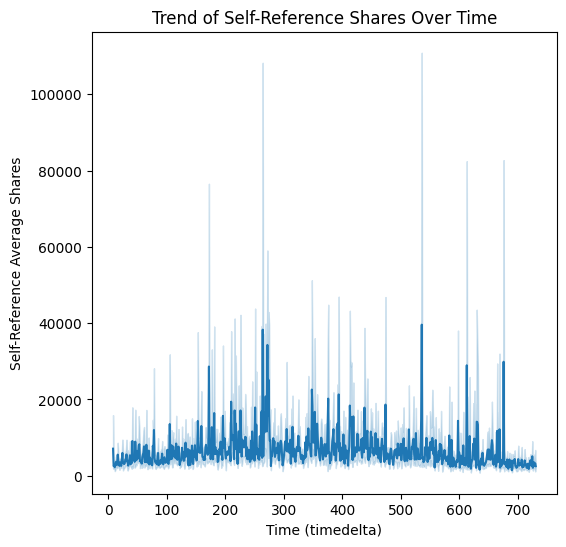

In [36]:

plt.figure(figsize=(6, 6))
sns.lineplot(x='timedelta', y='self_reference_avg_sharess', data=df)
plt.title('Trend of Self-Reference Shares Over Time')
plt.xlabel('Time (timedelta)')
plt.ylabel('Self-Reference Average Shares')
plt.show()


From the above, we can conclude that there's no specific trend in the number of self-references (self_reference_avg_sharess) over time

**3) How does the average sentiment polarity of titles (title_sentiment_polarity) correlate with shares (shares)?**

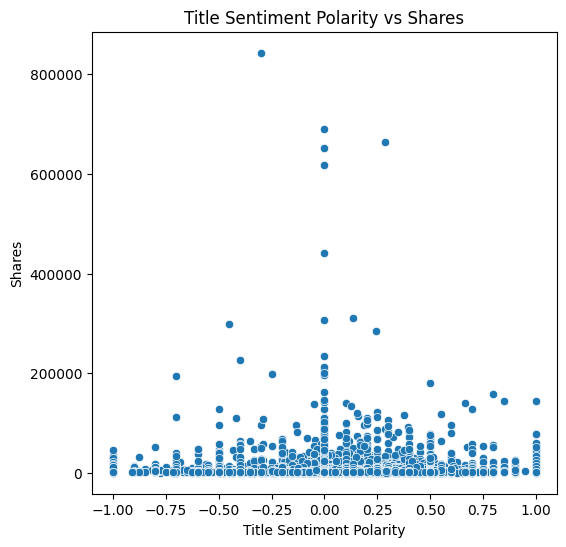

Correlation coefficient between title_sentiment_polarity and shares: 0.01277187314151463


In [38]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='title_sentiment_polarity', y='shares', data=df)
plt.title('Title Sentiment Polarity vs Shares')
plt.xlabel('Title Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

# Calculate correlation
correlation = df[['title_sentiment_polarity', 'shares']].corr().iloc[0, 1]
print(f"Correlation coefficient between title_sentiment_polarity and shares: {correlation}")


The correlation coefficient between the two variables is 0.0128, which is extremely close to zero, indicating that there is almost no linear relationship between the sentiment of the title (as measured by sentiment polarity) and the number of shares a post receives.

This suggests that sentiment polarity in titles (whether positive or negative) does not have a significant impact on the number of shares a post is likely to receive.

**4) How does the number of keywords (num_keywords) affect the shares?**

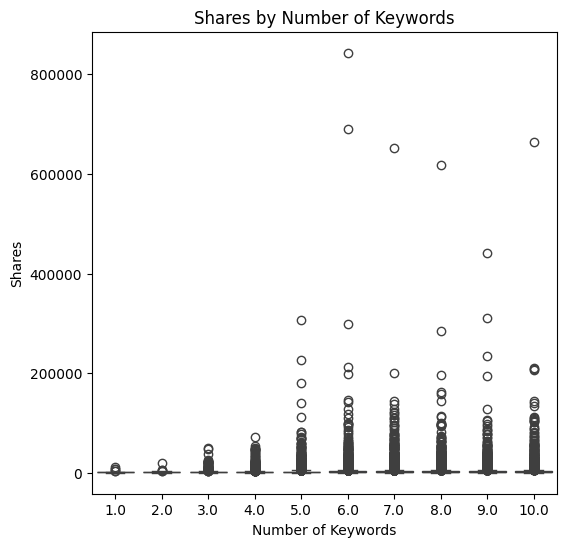

In [39]:

plt.figure(figsize=(6, 6))
sns.boxplot(x='num_keywords', y='shares', data=df)
plt.title('Shares by Number of Keywords')
plt.xlabel('Number of Keywords')
plt.ylabel('Shares')
plt.show()


From the above, we can conclude that up to 200,000 shares, most of the number of words fall below this value. Above that value, we can reasonably say that they are outliers, based on the image above. One point to note is that for 6 key words, there is a higher chance of having more shares.

**5) What is the distribution of global sentiment polarity (global_sentiment_polarity) for articles that received more than 1000 shares?**

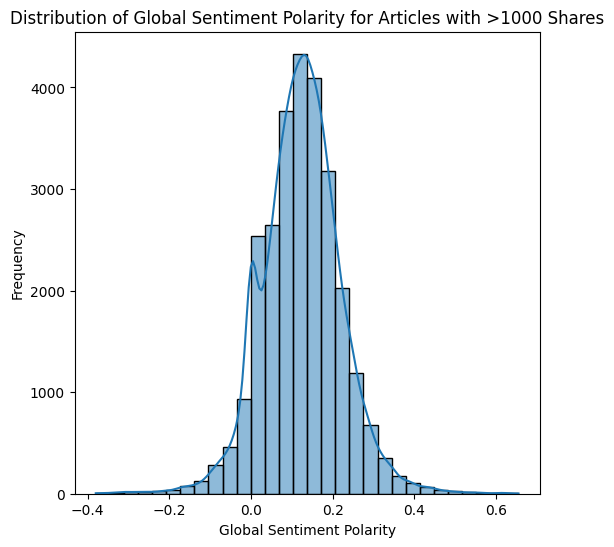

Mean of Global Sentiment Polarity: 0.12378557626330373
Variance of Global Sentiment Polarity: 0.009382944519193566


In [43]:
# Filter articles with more than 1000 shares
df_high_shares = df[df['shares'] > 1000]

# Plot the distribution of global sentiment polarity
plt.figure(figsize=(6, 6))
sns.histplot(df_high_shares['global_sentiment_polarity'], bins=30, kde=True)
plt.title('Distribution of Global Sentiment Polarity for Articles with >1000 Shares')
plt.xlabel('Global Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance for global_sentiment_polarity
mean_polarity = df_high_shares['global_sentiment_polarity'].mean()
variance_polarity = df_high_shares['global_sentiment_polarity'].var()

print(f"Mean of Global Sentiment Polarity: {mean_polarity}")
print(f"Variance of Global Sentiment Polarity: {variance_polarity}")

From the above, we can conclude that the distribution of Global Sentiment Polarity > 1000 shares is normal distribution with mean : 0.12378557626330373 and variance : 0.009382944519193566

**6) What is the average share count based on whether the article is in the "lifestyle" category (data_channel_is_lifestyle)?**

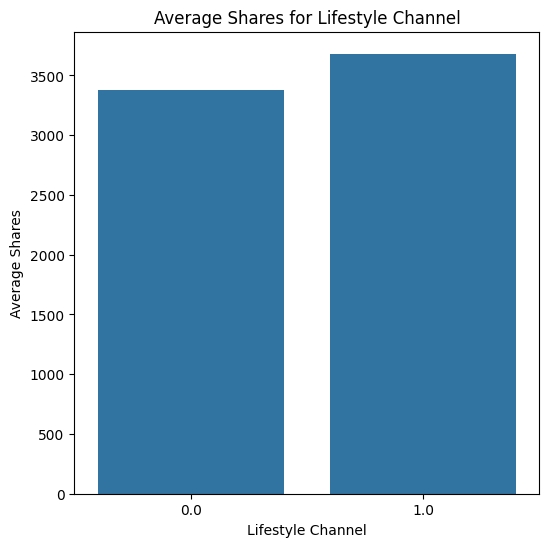

In [45]:
# Average shares for lifestyle channel
avg_shares_lifestyle = df.groupby('data_channel_is_lifestyle')['shares'].mean()

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=avg_shares_lifestyle.index, y=avg_shares_lifestyle.values)
plt.title('Average Shares for Lifestyle Channel')
plt.xlabel('Lifestyle Channel')
plt.ylabel('Average Shares')
plt.show()


From the above, we can conclude that candidates with a lifestyle channel receive more shares compared to those without one.

**7) What is the distribution of the number of tokens in the content (n_tokens_content) across different sentiment ranges (positive, negative)?**

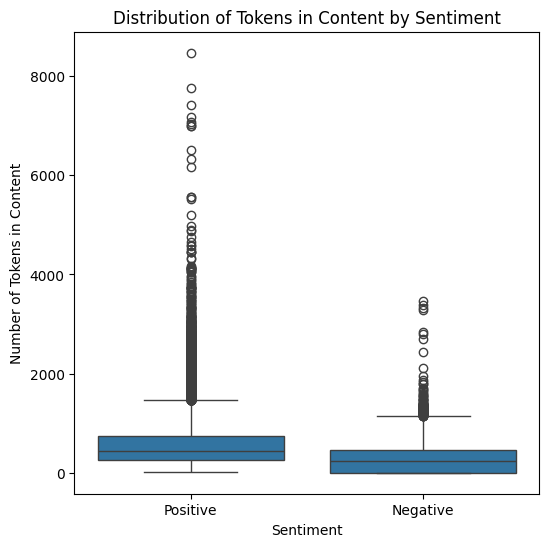

In [7]:
# Create sentiment labels
df['sentiment_label'] = df['global_sentiment_polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Plot distribution of token counts by sentiment
plt.figure(figsize=(6, 6))
sns.boxplot(x='sentiment_label', y='n_tokens_content', data=df)
plt.title('Distribution of Tokens in Content by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tokens in Content')
plt.show()


From the above figure, we can conclude the n_tokents_content is more for positive global sentiment when compared to negative global sentiment

**8) What is the relationship between the minimum and maximum keyword frequency (kw_min_min and kw_max_max) with the number of shares?**

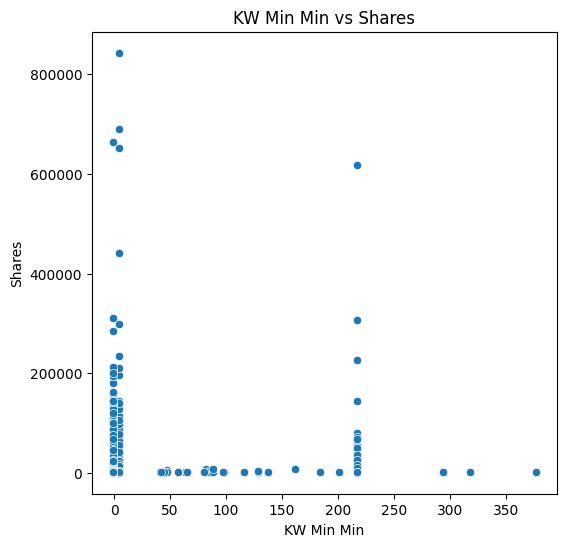

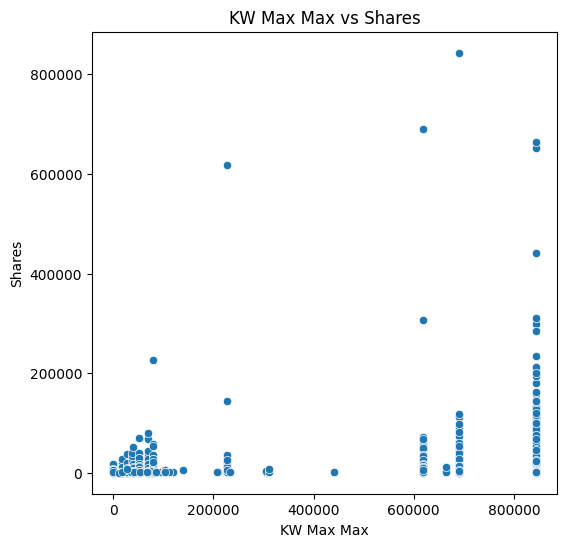

Correlation between kw_min_min and shares: -0.0010509877309310908
Correlation between kw_max_max and shares: 0.007862569278242018


In [9]:
# Scatter plot for kw_min_min vs shares
plt.figure(figsize=(6, 6))
sns.scatterplot(x='kw_min_min', y='shares', data=df)
plt.title('KW Min Min vs Shares')
plt.xlabel('KW Min Min')
plt.ylabel('Shares')
plt.show()

# Scatter plot for kw_max_max vs shares
plt.figure(figsize=(6, 6))
sns.scatterplot(x='kw_max_max', y='shares', data=df)
plt.title('KW Max Max vs Shares')
plt.xlabel('KW Max Max')
plt.ylabel('Shares')
plt.show()

# Calculate correlation
correlation_min = df[['kw_min_min', 'shares']].corr().iloc[0, 1]
correlation_max = df[['kw_max_max', 'shares']].corr().iloc[0, 1]
print(f"Correlation between kw_min_min and shares: {correlation_min}")
print(f"Correlation between kw_max_max and shares: {correlation_max}")


Both kw_min_min and kw_max_max appear to have a negligible or no linear correlation with the number of shares. Therefore, neither of these variables seems to be strong predictors of the number of shares in this dataset.

**9)How does the presence of videos (num_videos) influence the likelihood of high shares?**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define high shares as the target
df['high_shares'] = df['shares'] > 1000

X = df[['num_videos']]
y = df['high_shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of predicting high shares with num_videos: {accuracy}")


Accuracy of predicting high shares with num_videos: 0.6811703871862782


The logistic regression model, trained to predict whether shares exceed 1000 based on the number of videos (num_videos), achieved an accuracy of approximately 68.12%. This suggests that num_videos has moderate predictive value for determining high shares, though the model could benefit from additional features or more complex algorithms for improved performanc

**10) What is the impact of the average token length on the sentiment of the title?**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X = df[['average_token_length']]  # Using 'average_token_length' as the feature
y = df['title_sentiment_polarity']  # Target is 'title_sentiment_polarity'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("R²:", r2_score(y_test, y_pred))  # Measure of how well the model fits the data
print("MAE:", mean_absolute_error(y_test, y_pred))  # Average absolute difference between actual and predicted values


R²: 0.0007200761701701142
MAE: 0.17589612981063654


It resulted in a very low R² value of 0.0007, indicating that the model explains almost none of the variance in sentiment based on token length. Additionally, the Mean Absolute Error (MAE) of 0.1759 suggests that, on average, the model's predictions are off by about 0.18 units on the sentiment scale. This implies that average token length has minimal impact on the sentiment of the title, as the model does not show a strong relationship between these two variables.

**11) What role does the LDA topic model (LDA_00, LDA_01, etc.) play in predicting the number of shares (shares)?**


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Select features (LDA topics) and target variable
X = df[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']]  # LDA topic columns as features
y = df['shares']  # Target is 'shares'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))  # Evaluate prediction error
print("Feature Importance:", model.feature_importances_)  # Check how each LDA topic contributes


MAE: 3358.389560199211
Feature Importance: [0.22199754 0.19143657 0.20021642 0.20399051 0.18235896]


The model achieved a Mean Absolute Error (MAE) of 3358.39, indicating that, on average, the model's predictions are off by approximately 3358 shares. While the model's predictive performance shows room for improvement, the feature importance scores reveal that each of the LDA topics contributes significantly to the prediction. The topics appear to have roughly equal importance, with LDA_00 and LDA_03 being slightly more influential, contributing around 22% and 20%, respectively, to the model's predictions. These results suggest that the LDA topics derived from the text content do have a notable role in predicting the number of shares, though the model's overall accuracy could be enhanced by incorporating additional features

**12) How does posts with higher subjectivity (title_subjectivity) related to shares (shares)?**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X = df[['title_subjectivity']]  # Using 'title_subjectivity' as the feature
y = df['shares']  # Target is 'shares'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("R²:", r2_score(y_test, y_pred))  # R-squared metric for model accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))  # Mean absolute error for prediction accuracy


R²: 0.0004607862277075103
MAE: 3165.581033557878


The R² value of 0.00046 indicates that the model explains almost none of the variance in the number of shares based on subjectivity, suggesting that there is very little to no relationship between the subjectivity of the title and the number of shares. Additionally, the Mean Absolute Error (MAE) of 3165.58 implies that the model's predictions are off by an average of over 3,100 shares, further highlighting the lack of accuracy.

**13) How does the presence of self-references (self_reference_min_shares, etc.) affect the number of shares (shares)?**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Select features (self-reference features) and target variable
X = df[['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']]
y = df['shares']  # Target is 'shares'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))  # Measure error in prediction
print("Feature Importance:", model.feature_importances_)  # Check feature importance


MAE: 3269.72583400998
Feature Importance: [0.20320865 0.22095242 0.57583893]


The above achieved a Mean Absolute Error (MAE) of 3269.73. This indicates that, on average, the model's predictions are off by approximately 3,270 shares. While this error suggests room for improvement, the feature importance scores reveal that the self_reference_avg_sharess feature plays the most significant role in predicting the number of shares, contributing about 57.6% to the model's predictions. The other two features, self_reference_min_shares and self_reference_max_shares, contribute to a lesser extent, with importance scores of 20.3% and 22.1%, respectively.

These results suggest that self-references, particularly the average number of shares for posts with self-references, are important factors in determining the total number of shares. Posts with higher average shares in self-references are likely to attract more engagement, highlighting the potential influence of self-referential content on shareability. Further improvements to the model or the inclusion of additional relevant features could help refine these insights.

**14) What effect does the rate of positive words (rate_positive_words) have on the total number of shares (shares)?**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X = df[['rate_positive_words']]  # Using 'rate_positive_words' as the feature
y = df['shares']  # Target is 'shares'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("R²:", r2_score(y_test, y_pred))  # R-squared metric for model accuracy
print("MAE:", mean_absolute_error(y_test, y_pred))  # Mean absolute error for prediction accuracy


R²: 0.00044214695053579334
MAE: 3167.2555240933816


It achieved a very low R² value of 0.00044. This indicates that the model explains almost none of the variation in the number of shares, suggesting that the rate of positive words does not have a strong or meaningful relationship with shareability.

**15) Which combination of keywords (kw_min_min, kw_max_min, etc.) impacts the number of shares (shares)?**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Select features (keyword-related columns) and target variable
X = df[['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
          'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']]  # Keyword-related columns
y = df['shares']  # Target is 'shares'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))  # Measure error in prediction
print("Feature Importance:", model.feature_importances_)  # Check feature importance


MAE: 3371.3015949848805
Feature Importance: [0.01563271 0.08881503 0.12949424 0.05814168 0.01392626 0.14495645
 0.0761604  0.23586583 0.2370074 ]


It achieved a Mean Absolute Error (MAE) of 3371.30, indicating that the model's predictions are, on average, off by approximately 3,371 shares. While there is some error in the model's predictions, the feature importance scores reveal significant insights into which keyword-related features contribute most to predicting shares.

The most impactful features are:

kw_avg_avg (0.237) and kw_max_avg (0.235), both of which have the highest importance, suggesting that the average and maximum keyword-related metrics are strongly correlated with the number of shares.
Other important features include kw_avg_min (0.129), kw_max_min (0.088), and kw_min_avg (0.076), which also contribute notably to the model's predictions.
These results suggest that the combination of keyword-related metrics—particularly those reflecting the average and maximum keyword values—have a significant impact on the number of shares a post receives. The model's performance indicates that posts with certain keyword patterns or strengths, especially in terms of their averages or maximums, are more likely to be shared. Further refinement of the model or inclusion of additional features could potentially improve the accuracy of these insights.

**Model 1: Linear Regression (for continuous prediction)**

**Steps for Linear Regression:**

**Target Variable:** shares

**Features:** Columns selected from above, such as n_tokens_title, n_tokens_content, n_unique_tokens, etc.

**Preprocessing:** Handle missing data, scale features, and encode categorical variables if necessary.

**Model Building:**
Use Linear Regression from scikit-learn.
Evaluation: Evaluate the model's performance using R², Mean Squared Error (MSE), and Mean Absolute Error (MAE)**

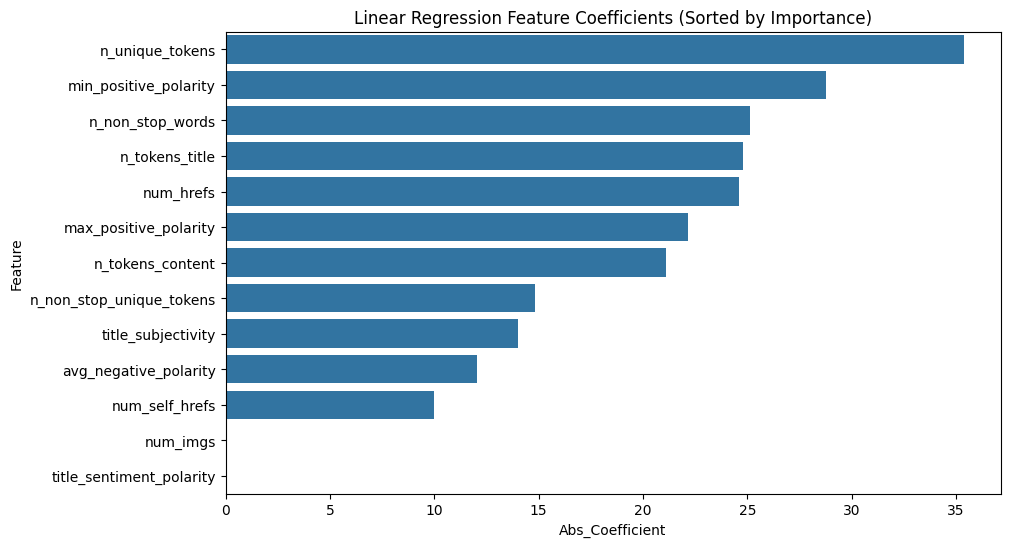

Linear Regression - Feature Coefficients (Most Important Features):
                 Feature  Abs_Coefficient
2        n_unique_tokens        35.362363
8  min_positive_polarity        28.762840
3       n_non_stop_words        25.141645
0         n_tokens_title        24.784716
5              num_hrefs        24.617112


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and prepare data
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
            'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
            'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',
            'title_subjectivity', 'title_sentiment_polarity']
target = 'shares'


df = df.dropna()
def replace_outliers_with_median(df):
    # Loop through each numeric column in the DataFrame
    for column_name in df.select_dtypes(include=[np.number]).columns:
        # Compute the median and the IQR (Interquartile Range)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier thresholds (1.5 * IQR rule)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

        # Replace outliers with the median of the column
        median_value = df[column_name].median()
        df.loc[outliers, column_name] = median_value

    return df


df = replace_outliers_with_median(df)

X = df[features]
y = df[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------- 1. Fit Linear Regression Model -------------------------
# Fit Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Get the coefficients and create a DataFrame
coefficients_lr = model_lr.coef_
coefficients_df_lr = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients_lr
})

# Sort features by absolute value of coefficients to identify important features
coefficients_df_lr['Abs_Coefficient'] = coefficients_df_lr['Coefficient'].abs()
coefficients_df_lr = coefficients_df_lr.sort_values(by='Abs_Coefficient', ascending=False)

# Plot Linear Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients_df_lr)
plt.title('Linear Regression Feature Coefficients (Sorted by Importance)')
plt.show()

# ------------------------- 2. Print Summary of Most Important Features -------------------------
print("Linear Regression - Feature Coefficients (Most Important Features):")
print(coefficients_df_lr[['Feature', 'Abs_Coefficient']].head())  # Top features by coefficient magnitude


**Model 2: Random Forest Regressor (for non-linear prediction)**

**Steps for Random Forest Regressor:**

**Target Variable:** shares

**Features:** Same features as above.

**Preprocessing:** Similar to Linear Regression, ensuring scaling if necessary.

**Model Building:**
Use RandomForestRegressor from scikit-learn.
Evaluation: Evaluate the model's performance using MSE, R², and MAE.


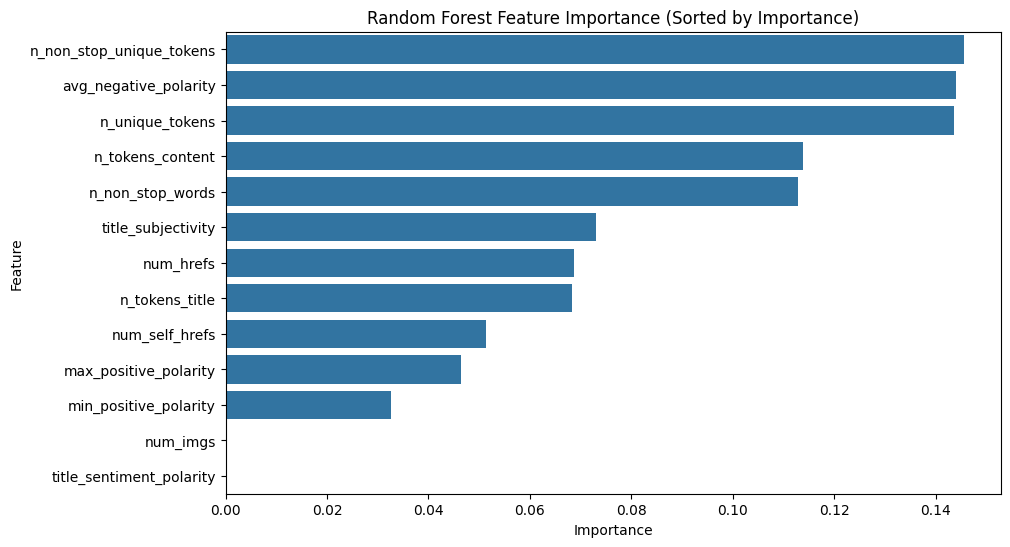

Random Forest - Feature Importance (Most Important Features):
                     Feature  Importance
4   n_non_stop_unique_tokens    0.145462
10     avg_negative_polarity    0.143991
2            n_unique_tokens    0.143590
1           n_tokens_content    0.113746
3           n_non_stop_words    0.112803


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and prepare data
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
            'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
            'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',
            'title_subjectivity', 'title_sentiment_polarity']
target = 'shares'

df = df.dropna()
def replace_outliers_with_median(df):
    # Loop through each numeric column in the DataFrame
    for column_name in df.select_dtypes(include=[np.number]).columns:
        # Compute the median and the IQR (Interquartile Range)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier thresholds (1.5 * IQR rule)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

        # Replace outliers with the median of the column
        median_value = df[column_name].median()
        df.loc[outliers, column_name] = median_value

    return df


df = replace_outliers_with_median(df)

X = df[features]
y = df[target]



# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------- 1. Fit Random Forest Regressor Model -------------------------
# Fit RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Get the feature importance from the Random Forest model
feature_importance_rf = model_rf.feature_importances_

# Create a DataFrame to hold the feature names and importance values
feature_importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance_rf
})

# Sort features by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf)
plt.title('Random Forest Feature Importance (Sorted by Importance)')
plt.show()

# ------------------------- 2. Print Summary of Most Important Features -------------------------
print("Random Forest - Feature Importance (Most Important Features):")
print(feature_importance_df_rf[['Feature', 'Importance']].head())  # Top features by importance score


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Select common important features
common_important_features = ['n_unique_tokens', 'n_non_stop_words']

# Create new datasets with only the common important features
X_train_important = X_train[common_important_features]
X_test_important = X_test[common_important_features]

# Step 2: Standardize the selected features
scaler = StandardScaler()
X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)

# ------------------------- 1. Fit Linear Regression Model on Important Features -------------------------
model_lr_important = LinearRegression()
model_lr_important.fit(X_train_important_scaled, y_train)

# Predict using the Linear Regression model
y_pred_lr = model_lr_important.predict(X_test_important_scaled)

# Calculate performance metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# ------------------------- 2. Fit Random Forest Regressor Model on Important Features -------------------------
model_rf_important = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_important.fit(X_train_important_scaled, y_train)

# Predict using the Random Forest model
y_pred_rf = model_rf_important.predict(X_test_important_scaled)

# Calculate performance metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# ------------------------- 3. Compare Performance Metrics -------------------------
print("Linear Regression Model Performance (Important Features):")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-Squared (R²): {r2_lr:.4f}\n")

print("Random Forest Model Performance (Important Features):")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-Squared (R²): {r2_rf:.4f}")


Linear Regression Model Performance (Important Features):
Mean Squared Error (MSE): 198075.9006
Root Mean Squared Error (RMSE): 445.0572
R-Squared (R²): 0.0034

Random Forest Model Performance (Important Features):
Mean Squared Error (MSE): 241030.5520
Root Mean Squared Error (RMSE): 490.9486
R-Squared (R²): -0.2127


**Interpretation and Conclusion**

Both models have very poor performance in predicting the target variable shares. This is evident from the high MSE and RMSE values, as well as the very low and negative R² scores.

The Linear Regression model, with an R² of 0.0034, performs almost as badly as a model that predicts the mean value for all observations.
The Random Forest model, while it does perform marginally worse than Linear Regression in terms of RMSE and MSE, has an even more negative R² score, indicating it is not capturing useful patterns in the data.

Feature Selection: Although we selected what we deemed important features from both models, it's possible that these features do not have a strong enough relationship with the target variable shares.

